**[개념 정리]**

앙상블 학습을 통한 분류: 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 앙상블 학습의 유형: 보팅, 배깅, 부스팅 등
    - 보팅 / 배깅: 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
        - 보팅: 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합
        - 배깅: 각각의 분류기가 모두 같은 유형의 알고리즘, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행
            - 부트스트래핑 분할 방식: 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식
            - 배깅 앙상블 방식: 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식
            - 배깅 방식은 중첩을 허용
    - 부스팅: 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하면서 학습과 예측을 진행
        - 그래디언트 부스트, XGBoost, LightBGM
    - 스태킹: 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델로 재학습시켜 결과를 예측하는 방법

보팅- 하드 보팅, 소프트 보팅
- 하드 보팅: 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
- 소프트 보팅: 분류기들의 레이블 값 결정 확률을 모두 더하고 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

보팅 분류기
- 사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공
    - 주요 생성 인자
        - estimators: 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력 받음
        - voting: 'hard'면 하드 보팅, 'soft'면 소프트 보팅

- 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되는 것 아님, 데이터 특성과 분포 등 다양한 요건에 따라 오히려 기반 분류기 중 가장 좋은 분류기의 성능이 보팅했을 때보다 나을수도 있음
    



---



배깅: 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘

랜덤 포레스트: 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정
- 서브세트 데이터는 부트스트래핑으로 데이터가 임의로 만들어짐
    - 부트스트래핑 분할 방식: 여러 개의 데이터 세트를 중첩되게 분리하는 것
- RandomForestClassifier 클래스를 통해 랜덤 포레스트 기반의 분류를 지원
- 하이퍼 파라미터 및 튜닝
    - n_estimators: 랜덤 포레스트에서 결정 트리의 개수를 지정
    - max_features: 결정 트리에 사용된 max_features 파라미터와 같으나 기본 max_features는 'None'이 아니라 'auto'
    - max_depth, min_samples_leaf: 과적합을 개선하기 위해 사용



---



부스팅 알고리즘: 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치를 부여하여 오류를 개선
- 대표적으로 AdaBoost와 그래디언드 부스트

AdaBoost: 오류 데이터에 가중치를 부여하면서 부스팅을 수행
- 개별 약한 학습기는 각각 가중치를 부여해 결합

GBM: 에이다부스트와 유사하나, 가중치 업데이트에 경사 하강법 이용
- 오류 값은 실제 값 - 예측값
    - 실제 결과 값을 y, 피처를 x, 예측 함수를 F(x)라고 하면 오류식은 h(x) = y - F(x)
        - 경사 하강법: 오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트
- 분류, 회귀 둘 다 가능
- 사이킷런은 GradientBoostingClassifier 제공
    - 병렬 처리가 지원되지 않아서 대용량 데이터의 경우 학습에 매우 많은 시간 필요
- 하이퍼 파라미터 및 튜닝
    - loss: 경사 하강법에서 사용할 비용 함수를 지정, 기본값 'deviance'
    - learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률, Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수
        - n_estimators와 상호 보완적으로 조합해 사용
    - n_estimators: weak learner의 개수
    - subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율


XGBoost: GBM의 느린 수행 시간 및 과적합 규제 부재 등의 문제를 해결
- 장점: 뛰어난 예측 성능, Tree pruning(나무 가지치기), 자체 내장된 교차 검증, 결손값 자체 처리
- XGBoost의 핵심 라이브러리는 C/C++로 작성
    - 파이썬 래퍼 XGBoost 모듈, 사이킷런 래퍼 XGBoost 모듈 존재

파이썬 래퍼 XGBoost
- 하이퍼 파라미터
    - 일반 파라미터: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위함
        - booster: gbtree 또는 gblinear 선택
        - silent: 디폴트는 0, 출력 메시지를 나타내고 싶지 않으면 1
        - nthread: CPU의 실행 스레드 개수를 조정
    - 부스터 파라미터: 트리 최적화, 부스팅, regularization 등과 관련
        - eta: GBM의 학습률과 같음
        - num_boost_rounds: GBM의 n_estimators와 같음
        - min_child_weight: 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합
        - gamma: 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값
        - max_depth: 트리 기반 알고리즘의 max_depth와 같음
        - sub_sample: GBM의 subsample과 동일
        - colsample_bytree: GBM의 max_features와 유사
        - lambda: L2 Regularization 적용 값
        - alpha: L1 Regularization 적용 값
        - scale_pos_weight: 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위함
    - 학습 태스크 파라미터: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정
        - objective: 최솟값을 가져야할 손실 함수를 정의
        - binary:logistic: 이진 분류일 때 적용
        - multi:softmax: 다중 분류일 때 적용
        - multi:softprob: 개별 레이블 클래스의 해당되는 예측 확률 반환
        - eval_metric: 검증에 사용되는 함수를 정의
- XGBoost만의 전용 데이터 객체인 DMatrix를 사용
    - DMatrix 주요 입력 파라미터: data, label
- 조기 중단의 성능 평가는 주로 검증 데이터 세트를 이용
    - early_stopping_rounds 파라미터를 설정해 조기 중단을 수행하려면 반드시 평가용 데이터 세트 지정과 evel_metric을 함께 설정
- XGBoost의 predict()는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환
- XGBoost의 시각화
    - plot_importance(): 피처의 중요도를 막대그래프 형식으로 나타냄
    - to_graphiz(): 규칙 트리 구조 그릴 수 있음
- cv(): 데이터 세트에 대한 교차 검증 수행 후 최적화 파라미터를 구할 수 있는 방법
    - 파라미터: params, dtrain, num_boost_round, nfold, stratified, metrics, early_stopping_rounds


사이킷런 래퍼 XGBoost
- 분류를 위한 래퍼 클래스인 XGBClassifier, 회귀를 위한 래퍼 클래스인 XGBRegressor
    - XGBClassifier에서 변경한 파라미터
        - eta -> learning_rate
        - sub_sample -> subsample
        - lambda -> reg_lambda
        - alpha -> reg_alpha
- 조기 중단 기능
    - 조기 중단 관련한 파라미터를 fit()에 입력
        - 파라미터: early_stopping_rounds, eval_metric, eval_set
        
    - 성능 평가를 수행할 데이터 세트는 학습 데이터가 아니라 별도의 데이터 세트

**[코드 필사]**

**4.3**

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer=load_breast_cancer()

data_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [2]:
#개별 모델은 로지스틱 회귀와 KNN임
lr_clf=LogisticRegression(solver='liblinear')
knn_clf=KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf=VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target,
                                                  test_size=0.2, random_state=156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

#개별 모델의 학습/예측/평가
classifiers=[lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred=classifier.predict(X_test)
    class_name=classifier.__class__.__name__
    print('{0} 정확도:{1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도:0.9561
LogisticRegression 정확도:0.9474
KNeighborsClassifier 정확도:0.9386


**4.4**

In [3]:
#이전 과제에서 가져와야 하는 코드
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df=pd.read_csv('features.txt', sep='\s+',
                            header=None, names=['column_index','column_name'])
feature_name=feature_name_df.iloc[:,1].values.tolist()

feature_dup_df=feature_name_df.groupby('column_name').count()
feature_dup_df[feature_dup_df['column_index']>1].head()

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                columns=['dup_cnt'])
    feature_dup_df=feature_dup_df.reset_index()
    new_feature_name_df=pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name']=new_feature_name_df[['column_name',
                                                            'dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1])
                                                            if x[1]>0 else x[0], axis=1)
    new_feature_name_df=new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset():
    feature_name_df=pd.read_csv('features.txt', sep='\s+',
                                header=None, names=['column_index','column_name'])
    new_feature_name_df=get_new_feature_name_df(feature_name_df)
    feature_name=new_feature_name_df.iloc[:,1].values.tolist()
    X_train=pd.read_csv('X_train.txt', sep='\s+', names=feature_name)
    X_test=pd.read_csv('X_test.txt', sep='\s+', names=feature_name)
    y_train=pd.read_csv('y_train.txt', sep='\s+', header=None, names=['action'])
    y_test=pd.read_csv('y_test.txt', sep='\s+', header=None, names=['action'])
    return X_train, X_test, y_train, y_test

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test=get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf=RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9220


In [5]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth':[8,16,24],
    'min_samples_leaf':[1,6,12],
    'min_samples_split':[2,8,16]
}

#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf=RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 16}
최고 예측 정확도:0.9157


In [6]:
rf_clf1=RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16,
                               min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:0.9253


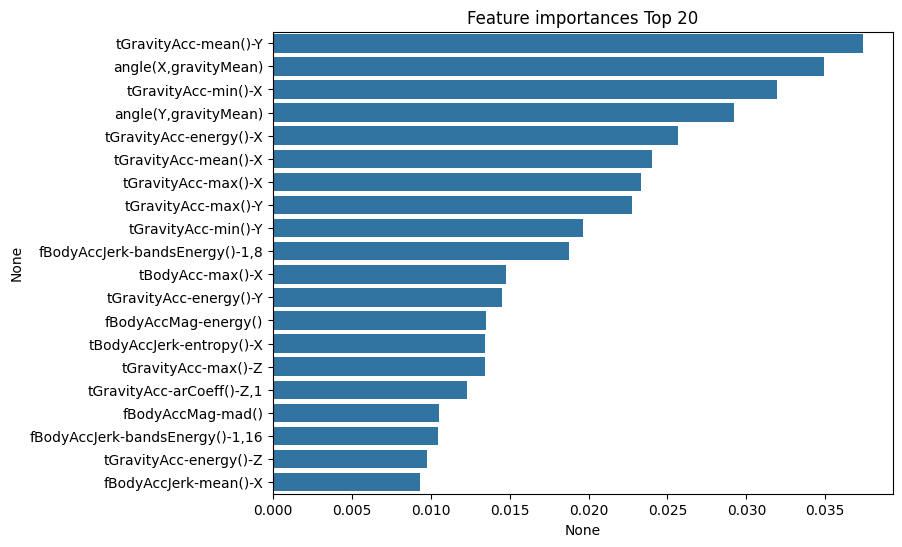

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values=rf_clf1.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

**4.5**

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test= get_human_dataset()

#GBM 수행 시간 측정을 위함, 시작 시간 설정
start_time=time.time()

gb_clf= GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f}초".format(time.time()-start_time))

GBM 정확도: 0.9379
GBM 수행 시간: 1250.0초


**4.6**

In [9]:
pip install xgboost

In [10]:
import xgboost as xgb
from xgboost import XGBClassifier

In [11]:
import xgboost

print(xgboost.__version__)

2.1.4


In [12]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
features=dataset.data
labels=dataset.target

cancer_df=pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target']=labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [13]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [14]:
#cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
#맨 마지막 칼럼이 Label임, Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두 번째 칼럼까지를 :-1 슬라이싱으로 추출
X_features=cancer_df.iloc[:, :-1]
y_label=cancer_df.iloc[:, -1]

#전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156)

#위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val=train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [15]:
#만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우 X_train.values로 넘파이 변환
#학습, 검증, 테스트용 DMatrix를 생성
dtr=xgb.DMatrix(data=X_tr.values, label=y_tr)
dval=xgb.DMatrix(data=X_val.values, label=y_val)
dtest=xgb.DMatrix(data=X_test.values, label=y_test)

In [16]:
params={'max_depth':3,
        'eta':0.05,
        'objective':'binary:logistic',
        'eval_metric':'logloss'
    }
num_rounds=400

In [17]:
#학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기
eval_list=[(dtr,'train'), (dval,'eval')] #또는 eval_list=[(dval, 'eval')] 만 명기해도 무방

#하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model=xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds, \
                    early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.62480	eval-logloss:0.63104
[1]	train-logloss:0.58674	eval-logloss:0.60478
[2]	train-logloss:0.55226	eval-logloss:0.58223
[3]	train-logloss:0.52086	eval-logloss:0.56184
[4]	train-logloss:0.49192	eval-logloss:0.54118
[5]	train-logloss:0.46537	eval-logloss:0.52223
[6]	train-logloss:0.44029	eval-logloss:0.50287
[7]	train-logloss:0.41666	eval-logloss:0.48620
[8]	train-logloss:0.39525	eval-logloss:0.46974
[9]	train-logloss:0.37542	eval-logloss:0.45497
[10]	train-logloss:0.35701	eval-logloss:0.44131
[11]	train-logloss:0.33982	eval-logloss:0.43134
[12]	train-logloss:0.32297	eval-logloss:0.41972
[13]	train-logloss:0.30725	eval-logloss:0.40902
[14]	train-logloss:0.29327	eval-logloss:0.39883
[15]	train-logloss:0.27946	eval-logloss:0.38968
[16]	train-logloss:0.26691	eval-logloss:0.38150
[17]	train-logloss:0.25473	eval-logloss:0.37368
[18]	train-logloss:0.24385	eval-logloss:0.36666
[19]	train-logloss:0.23338	eval-logloss:0.35994
[20]	train-logloss:0.22320	eval-logloss:0.35374
[2

In [18]:
pred_probs=xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

#예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds=[1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.938 0.004 0.75  0.049 0.98  1.    0.999 0.999 0.998 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [19]:
#이전 과제에서 가져와야 하는 코드
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def get_clf_eval(y_test,pred=None,pred_proba=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)

    roc_auc=roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [20]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740, F1:0.9740, AUC:0.9965


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

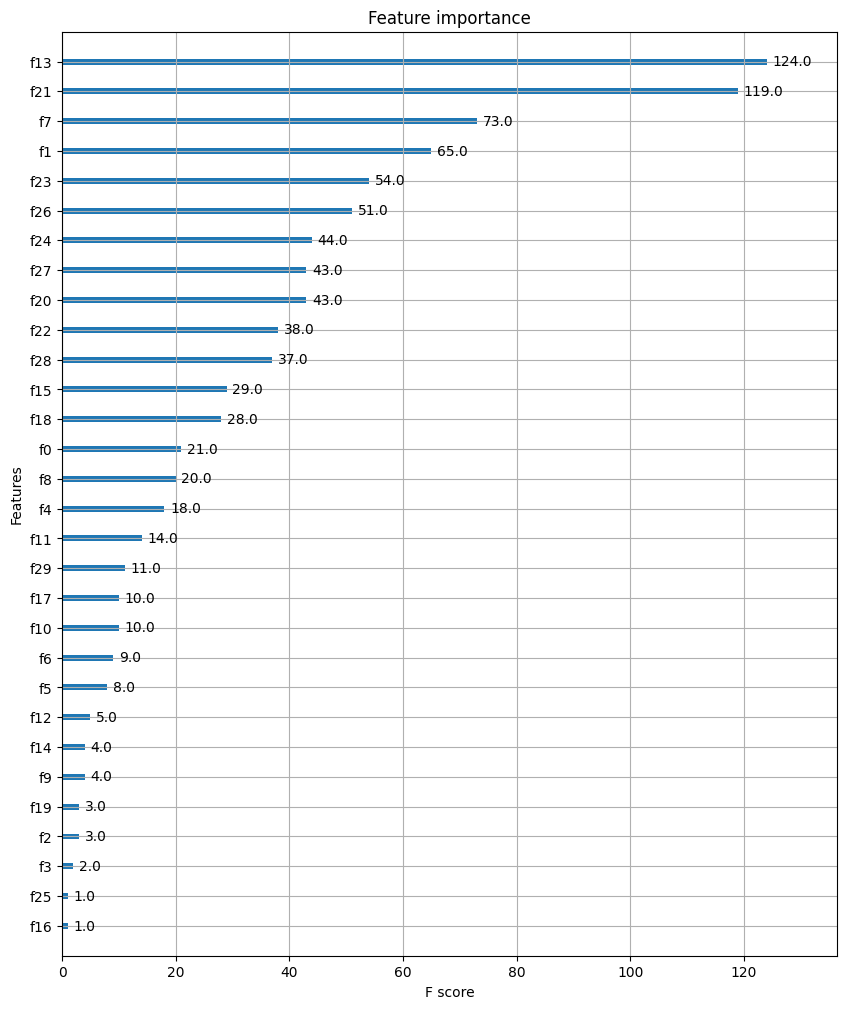

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

In [22]:
#사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

#Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
                          eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds=xgb_wrapper.predict(X_test)
w_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

In [23]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1:0.9806, AUC:0.9954


In [29]:
from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3
                          , early_stopping_rounds=50, eval_metric="logloss")
evals=[(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals, verbose=True)
ws50_preds=xgb_wrapper.predict(X_test)
ws50_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

In [30]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740, F1:0.9740, AUC:0.9961


In [32]:
#early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3
                          , early_stopping_rounds=10, eval_metric="logloss")
evals=[(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals, verbose=True)
ws10_preds=xgb_wrapper.predict(X_test)
ws10_pred_proba=xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

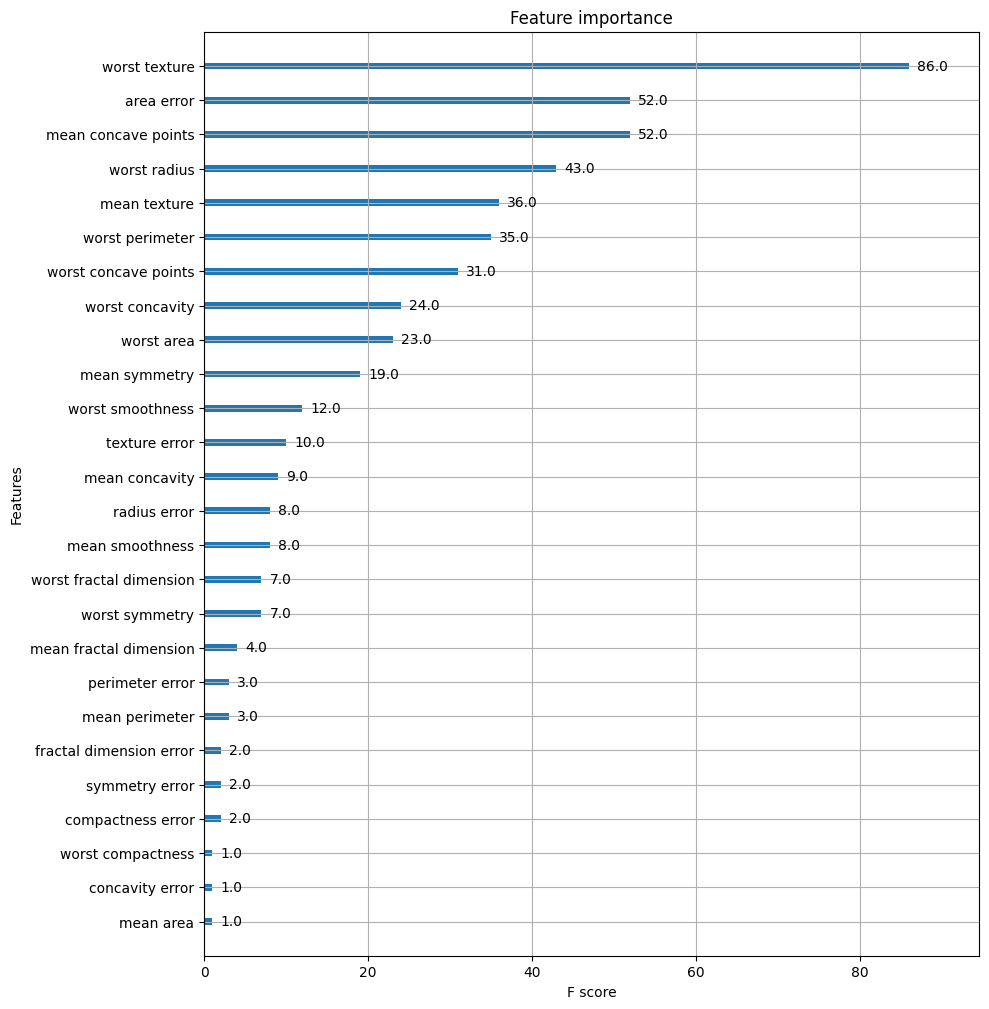

In [33]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
#사이킷런 래퍼 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax)